# DSCI 511: Data acquisition and pre-processing<br>Chapter 2: Working with Python's data types
## Exercises
Note: numberings refer to the main notes.

#### 2.1.1.6 Exercise: trace of a matrix

The trace of a (square) matrix (list of lists) is the sum of it's diagonal elements.
Loop over the matrix's rows and add up the diagonal values for the trace. We'll be working with the simple 3 x 3 matrix:
```
[[1, 2, 3],   
 [4, 5, 6],  
 [7, 8, 9]]
```

#### Discussion: using `enumerate()` to manage indices
Here, it's very helpful to know the index of each element (both row and column). To gather these in our loop, we can unpack tuples from the `enumerate()` function, which provides index-value tuples through a generator. When the row and column index are equal, we have a diagonal element and add it onto the `trace`'s running tally.

In [ ]:
matrix = [[4, 8, 4], [3, 2, 6], [5, 3, 7]] # print this matrix
# Hint: You'll need for loops!
trace = 0
for i, row in enumerate(matrix):
    for j, val in enumerate(row):
        if i == j:
            trace += val
print(trace)

13


#### 2.1.1.8 Exercise: Sorting lists

You might have noticed that the list `y` is a list containing the first 14 numbers in the Fibonacci sequence, i.e., any number can be calculated from the sum of the previous two numbers. 

Now, use a `for` loop to calculate the next 10 Fibonacci numbers and append them to list `y`. 

#### Discussion: Reverse indexing and slicing
We can easily get 10 passes through a loop by iterating over `range(10)` (__Note__: we dont actually use `i`!). However, accessing the last two elements of the current running list could be tricky if we ad to ,e.g., check how long the list was and pull out values by explicit index. Instead, we can _slice_ out the last two elements using negative indexing. the `-2` index refers to the second from last, and by leaving a blank on the other side of the `:`, colon slice operator we're telling Python to gather the elements from that (`-2`) point through the list's end. From there, `sum()` nicely handles the summation on the list slice, and we can then use the `.append()` method.

In [5]:
y = [0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144] # These are the first 13 numbers in the sequence
# Hint: You'll need to use list indices

for i in range(10):
    new_fib = sum(y[-2:])
    y.append(new_fib)
    
y

[0,
 1,
 1,
 2,
 3,
 5,
 8,
 13,
 21,
 34,
 55,
 89,
 144,
 233,
 377,
 610,
 987,
 1597,
 2584,
 4181,
 6765,
 10946,
 17711]

#### 2.1.1.11 Exercise: Flattening a matrix into a list
Using either a nested comprehension or a nested for loop, conver the matrix below into a single list of values. Discuss how they become ordered, i.e., by column or row.
#### Discussion: unwinding nested objects with comprehensions
This is a pretty confusing syntax to see for the first time. As discussed, comprehensions reverse the order of expressions and iteration from loops. However, the order of nesting remains the same!

In [ ]:
## our starting matrix
matrix = [[8, 2, 3], [9, 1, 9], [5, 4, 1]]

## first try using nested loops
flattened_matrix = []
for row in matrix:
    for element in row:
        ## this is the `expression(x)`; it comes last!
        flattened_matrix.append(element)
print(flattened_matrix)

## now try using nested comprehensions
## it can help to see the similarity 
## by blocking out a comprehensions
flattened_matrix = [element ## note: the expression(x) comes first
                    for row in matrix ## iteration in same order
                    for element in row]
print(flattened_matrix)

[8, 2, 3, 9, 1, 9, 5, 4, 1]
[8, 2, 3, 9, 1, 9, 5, 4, 1]


#### 2.1.2.3 Exercise: tuple unpacking and list transformation
Use a list comprehension to create a list of all the author names from the given list of tuples containing title, author, and publication year.

#### Discussion: pulling out a column
Since both lists and tuples are types of ordered arrays, iteration over `books` in the comprehension `[book[1] for book in books]` provides access to each row/tuple of data. Our expression in the comprehension can be though of as 'get the 1th column', using ordered indexing to get the author.  

In [ ]:
books = [("A Tale of Two Cities", "Charles Dickens", 1859), 
         ("Crime and Punishment", "Fyodor Dostoyevski", 1866),
         ("Heart of Darkness", "Joseph Conrad", 1899), 
         ("Brave New World", "Aldous Huxley", 1932), 
         ("The Stranger", "Albert Camus", 1942)]

# Dazzle yourself with your list comprehension skills!
authors = [book[1] for book in books]
authors

['Charles Dickens',
 'Fyodor Dostoyevski',
 'Joseph Conrad',
 'Aldous Huxley',
 'Albert Camus']

#### 2.1.4.2 Exercise: functions review
Write your own basic version of the built-in `range()` function. It should take only one argument, the number before which the range should stop; and it should return a list containing all integers up to that end point.

#### Discussion:  `return` is final, i.e., ends a function
The prompt requests list output and this is because a function's `return` is final. This means we can't return each integer from inside of the while loop, but instead have to instantiate a list object (`stop_ints`), load it up with the integers and `return` it at the end.

In [ ]:
# code goes here
def my_range(stop):
    stop_int = 0
    stop_ints = []
    while stop_int < stop:
        stop_ints.append(stop_int)
        stop_int = stop_int + 1
    return stop_ints
# using the my_range() function, print out the first 25 integers
my_range(25)

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24]

#### 2.1.4.4 Exercise: generator functions
Rewrite `my_range()` as a generator function and print out the first 25 integers using this generator function.

#### Discussion: `yield` is incremental
Generators are functions whose output can be iterated over, produced lazily. To make one, instead of ending a function with final output using `return`, any piece of output can be `yield`ed as it is computed. Notice below how the `yield` statement is not being applied to the `stop_int` inside of the loop, and that no list object is being managed or `return`ed. To handle the output, notice that only a function (the generator) is referenced if it is not iterated upon. To receive the full output of the generator it can be iterated upon, or coerced into a list.

In [ ]:
# code goes here, this time as a generator function
def my_range(stop):
    stop_int = 0
    while stop_int < stop:
        stop_int = stop_int + 1
        yield stop_int

# using the my_range() generator function, print out the first 25 integers
print(my_range(25))
for i in my_range(25):
    print(i)
print(list(my_range(25)))

<generator object my_range at 0x1047fede0>
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25]


#### 2.1.4.6 Exercise: lambda function data transformation for a sort
Sort this list of books in descending order of year of publication (i.e. the more recently published books should come first) using a lambda function with `sorted()`.

#### Discussion: the `lambda` function relies upon an implied schema
The sorting key provided to tell `sorted()` to sort by the year, i.e., third column, assumes that there is always a `2`th element of each element (tuple) in the list being sorted:
- `key = lambda x: x[2]`

This might seem strange at first, but the `x` is a dummy variable that just tells the `sorted()` function which aspect of a piece of data (in the list) to sort by. It says 'given a tuple `x`, sort by the `2`th element, `x[2]`.

In [ ]:
books = [("A Tale of Two Cities", "Charles Dickens", 1859), 
         ("Crime and Punishment", "Fyodor Dostoyevski", 1866),
         ("Heart of Darkness", "Joseph Conrad", 1899), 
         ("Brave New World", "Aldous Huxley", 1932), 
         ("The Stranger", "Albert Camus", 1942)]

## code goes here
reverse_books = sorted(books, reverse = True, key = lambda x: x[2])
reverse_books

[('The Stranger', 'Albert Camus', 1942),
 ('Brave New World', 'Aldous Huxley', 1932),
 ('Heart of Darkness', 'Joseph Conrad', 1899),
 ('Crime and Punishment', 'Fyodor Dostoyevski', 1866),
 ('A Tale of Two Cities', 'Charles Dickens', 1859)]

#### 2.2.2.4 Exercise: interacting with dictionaries
Write code that uses a loop to iterate over `books_dict` and create three separate lists of titles, authors, and years, populated by the correct values.

#### Discussion: dictionary iteration defaults to keys
However, since we know that each book has a `"title"` we can get away with pulling the actual value for a book by the string-key directly. 

In [ ]:
books_dict = {0 : {"title" : "A Tale of Two Cities",
                   "author" : "Charles Dickens",
                   "year" : 1859},
             1 : {"title" : "Crime and Punishment",
                 "author" : "Fyodor Dostoyevski",
                 "year" : 1866},
             2 : {"title" : "Heart of Darkness",
                 "author" : "Joseph Conrad",
                 "year" : 1899},
             3 : {"title" : "Brave New World",
                 "author" : "Aldous Huxley",
                 "year" : 1932},
             4 : {"title" : "The Stranger",
                 "author" : "Albert Camus",
                 "year" : 1942}}

titles = []
authors = []
years = []

# Remember, dictionaries iterate over keys by default!
for booknum in books_dict:
    title = books_dict[booknum]["title"]
    titles.append(title)
print(titles)

['A Tale of Two Cities', 'Crime and Punishment', 'Heart of Darkness', 'Brave New World', 'The Stranger']


#### 2.2.2.6 Exercise: Counting with a base Python dictionary
Say we have a list of results of soccer games. There are three possibilities: win (W), loss (L), and draw (D). Count the number of wins, losses, and draws using the `counts` dictionary.

#### Discussion: infullness implementation
The implementation below utilizes the infullness approach, if the boolean value of `result in counts` is `True` we modify (increment) the value present in `counts[result]`, while if the boolean value is `False` we get the value of `counts[value]` started with direct assignment to `1`.

In [ ]:
results = ["W", "W", "L", "D", "W", "L", "L", "L", "W", 
           "D", "W", "W", "D", "W", "D", "L", "W", "W", "L", "W"]
counts = {}
## loop through results and count the number of times each occurred 
## use infullness: test to see a value needs to be assigned or modified
## use `.setdefault()` to make sure a starting value is assumed, i.e., pre-assigned
for result in results:
    if result in counts:
        counts[result] += 1
    else:
        counts[result] = 1
counts

{'W': 10, 'L': 6, 'D': 4}

#### 2.2.2.7 Exercise: sorting a dictionary's keys by value
As discussed, default iteration on a dictionary is by key. This means a default `sorted()` call on a dictionary will return a sorting of the dictionary's keys. Use this, and the `key=lambda x: expression(x)` syntax to sort the dictionary from the exercise in __Section 2.2.2.6__ to sort the keys (game result types) of the `counts` dictionary by value, from high to low (`reverse = True`), and use a loop to print out the top 2 most common game result types and their counts.

#### Discussion: sorting a dictionary by values
Since `sorted()` will operate on the keys, we can provide a lambda function that assumes each key has a corresponding value in `counts`. In other words, the lambda function
- `lambda x: counts[x]`

says, 'given a key, `x` (input), sort by its value in `counts[x]` (output)'.

In [ ]:
## use a lambda function in the `key` argument of sorted()
sorted_results = sorted(counts, reverse = True, key = lambda x: counts[x])
i = 0
for result in sorted_results:
    print(result, counts[result])
    i += 1
    if i == 2:
        break

W 10
L 6


#### 2.2.2.9 Exercise: counters
Count the results and calculate a point tally, where a win equals 3 points, a draw equals 1 point, and a loss equals 0 points.

#### Discussion: A solution using weights
Here, we used a dictionary of weights. Technically, we could have just started with the `count` `Counter()` already constructed in __Section 2.2.2.7__ and used some `if`/`else` statements inside of the loop to check the different result types (e.g., `"W"`) by hand and increment `points` by the appropriate value, but the use of `weights` let's us think ahead about 'metadata' and how it can be used to support a tasks.

In [ ]:
from collections import Counter

results = ["W", "W", "L", "D", "W", "L", "W", "D", "W", "L", "L", "W", "D", "W", "W", "L", "L", "W", "D", "W", "D", "L", "W", "W", "L", "W"]
result_counts = Counter()
points = 0

## Specify the weights
weights = {
    "W": 3,
    "D": 1,
    "L": 0
}
# Use a loop!
count = Counter()
for result in results:
    count[result] += weights[result]
    
points = sum(count.values())
print(points)

44


## Additional In-depth Exercises

### A. Load a csv of your choosing and determine an appropriate data type

Load, e.g., `../introduction/data/APPL.csv` and convert to a dictionary of lists, or appropriate data type.

In [20]:
%ls ../introduction/data/

APPL.csv    colors.json  example_text_file.txt  pickled_dictionary.p
colors.csv  colors.xml   JSONd_dictionary.json  XMLd_dictionary.xml


In [39]:
from collections import defaultdict
import csv

stock_reader = csv.reader(open("../introduction/data/APPL.csv", "r")) 

# stocks = list(stock_reader)
stocks_df = defaultdict(list)
header = []
for i, row in enumerate(stock_reader):
  if i:
    for j, x in enumerate(row):
      # if header:
      stocks_df[header[j]].append(x)
  else:
    header = list(row)

print(stocks_df.keys(), stocks_df["Date"][:10])

stock_dicts = csv.DictReader(open("../introduction/data/APPL.csv", "r")) 
for x in stock_dicts:
  print(x)
  break

dict_keys(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close']) ['2016-07-13', '2016-07-12', '2016-07-11', '2016-07-08', '2016-07-07', '2016-07-06', '2016-07-05', '2016-07-01', '2016-06-30', '2016-06-29']
OrderedDict([('Date', '2016-07-13'), ('Open', '97.410004'), ('High', '97.669998'), ('Low', '96.839996'), ('Close', '96.870003'), ('Volume', '25892200'), ('Adj Close', '95.442123')])


### B. Transform an ordered array
Again, load your csv and this time sort by the open-close change in price, and then sorted, multiplying these changes by the volume as a weight.

In [ ]:
## code here

### C. Sort an associative array
Load `../introduction/data/colors.json` and sort colors according to the different RGB 'columns' and confirm if these are indeed heavily shades of blue!

In [ ]:
## code here

### D. Write a function to blend colors
Write a function that takes the data in `../introduction/data/colors.json`, and 'blends' colors by averaging the RGB values. The below cell should just let us check our work.

/usr/local/lib/python3.6/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


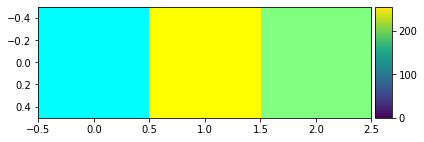

In [41]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from skimage import io
import json

with open("../introduction/data/colors.json", "r") as f:
  colors = json.loads(f.read())

def blend_colors(c1, c2):
  if (c1 not in colors) or (c2 not in colors):
    print("at least one color was missing!")
    return([0,0,0])
  else:
    return([int(0.5 + (colors[c1][i] + colors[c2][i])/2) for i in range(3)])

c1 = "cyan"
c2 = 'yellow'

io.imshow(
    np.array([
        [colors[c1][:3], colors[c2][:3], blend_colors(c1, c2)], 
    ])
)